In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
train_data = pd.read_excel(r"/Users/chideranwankwo/Desktop/Flight_Price_resources/Data_Train.xlsx")

In [15]:
train_data.info()  #notice that route and total stops have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [16]:
train_data.isnull().sum() #boolean DB that checks if a value is null... false means it is not empty

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [17]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [18]:
train_data[train_data['Total_Stops'].isnull()] #this filters the exact rows in total stops that have the missing values(s)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [19]:
train_data.dropna(inplace=True)

In [20]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [21]:
data = train_data.copy()

In [22]:
def change_into_dateTime(col):   #this function converts the listed features intomdat and time datatypes
   data[col]=  pd.to_datetime(data[col])

In [23]:
train_data.info(memory_usage="deep") # more accurate memory

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [24]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [25]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [27]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_dateTime(feature)

In [28]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [29]:
data["journey_Day"] = data['Date_of_Journey'].dt.day   #add the derived attribute from the Date_of_Journey feature into the data set

In [30]:
data["journey_Month"] = data['Date_of_Journey'].dt.month

In [31]:
data["journey_Year"] = data['Date_of_Journey'].dt.year

In [32]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_Month,journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-03-23 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-23 05:50:00,2025-03-23 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [33]:
def extract_hour_min(df, col):
  df[col+"_Hour"] = df[col].dt.hour
  df[col+"_Minute"]= df[col].dt.minute
  return df.head(2)
    

In [34]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_Month,journey_Year,Dep_Time_Hour,Dep_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-03-23 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-23 05:50:00,2025-03-23 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [35]:
extract_hour_min(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_Month,journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-03-23 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-23 05:50:00,2025-03-23 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [36]:
col_to_drop =['Dep_Time', 'Arrival_Time']
data.drop(col_to_drop, axis= 1, inplace= True)

In [37]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_Month,journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10


In [38]:
def flight_departure_time(x):   #if statement that shows the number of flights at various hours of the day
    if (x > 4) and (x <= 8):
        return "Early Morning"
    
    elif (x > 8) and (x <= 12):
        return "Morning"
    
    elif (x > 12) and (x <= 16):
        return "Noon"
    
    elif (x > 16) and (x <= 20):
        return "Evening"
    
    elif (x > 20) and (x <= 24):
        return "Night"

    else:
        return "Late Night"    

In [41]:
data['Dep_Time_Hour'].apply(flight_departure_time).value_counts()

Dep_Time_Hour
Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late Night        465
Name: count, dtype: int64

In [49]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs

init_notebook_mode(connected=True)  # Enables interactive plots in Jupyter Notebook
cf.go_offline()  # Allows Cufflinks to work without an internet connection

data['Dep_Time_Hour'].apply(flight_departure_time).value_counts().iplot( kind="bar")

#this displays total number of flights that happen daily and ho frequent they occur from morning to night

In [53]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h ' + x  
    elif 'm' not in x:  
        x = x + ' 0m'  
    return x


In [54]:
data['Duration']= data['Duration'].apply(preprocess_duration)

In [63]:
data['Duration_Hours']= data['Duration'].apply(lambda x :int(x.split(' ')[0][0:-1]) )

In [68]:
data['Duration_Mins']=data['Duration'].apply(lambda x :int(x.split(' ')[1][0:-1]) )

In [70]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_Month,journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [71]:
data['Duration_total_mins'] = data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [72]:
data['Duration_total_mins'] # This is used to compare prices against Duration of fliht to see how these factors affect themselves 

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

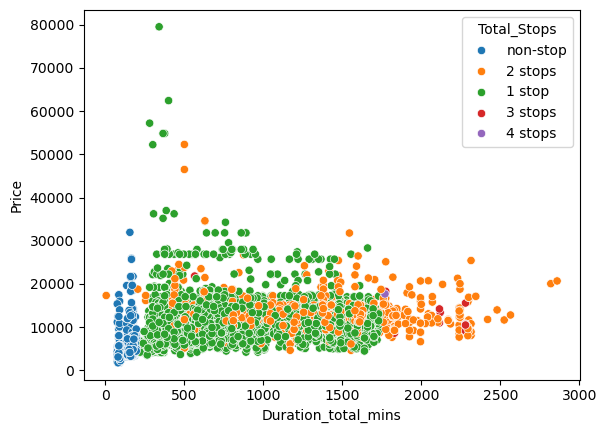

In [73]:
sns.scatterplot(x='Duration_total_mins', y='Price', hue='Total_Stops', data=data)  

In [74]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

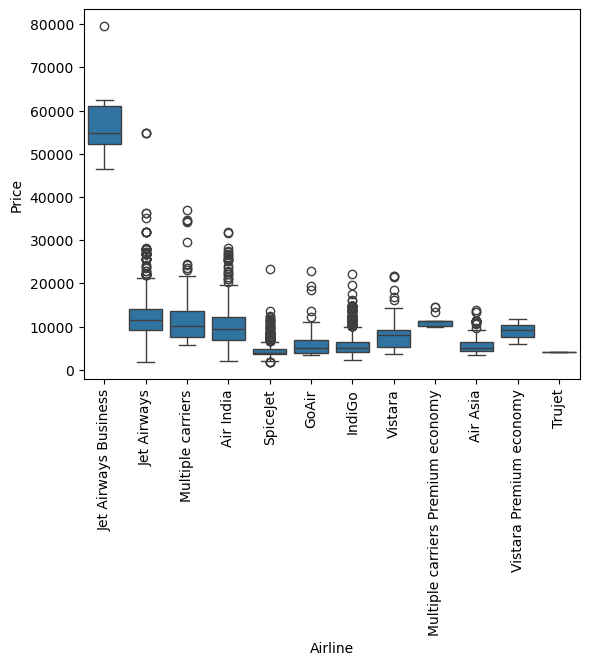

In [75]:
#cretates a box plot that displays he min value, Max value, median , Q1 and Q3 of the dataset

sns.boxplot(y='Price',x='Airline',  data= data.sort_values('Price',ascending=False))  
plt.xticks(rotation ="vertical")
plt.show()

In [77]:
#one hot encoding(Feature encoding)
cat_col =[col for col in data.columns if data[col].dtype=='object'] #loops through the dataset and returns the columns with the datatype object

In [78]:
num_col = [col for col in data.columns if data[col].dtype!='object']

In [79]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [80]:
for sub_category in data['Source'].unique():
   data['Source_' + sub_category] = data['Source'].apply(lambda x : 1 if x== sub_category else 0 )

In [82]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Day,...,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [86]:
#Target encoding on the dataset in which a ctegory is placed against the target feature (Price ehich were tryng to predict)

In [87]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [88]:
airlines 

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [90]:
dict_airlines = {key: index for index, key in enumerate(airlines, 0)}

In [91]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [94]:
data['Airline']=data['Airline'].map(dict_airlines)

In [97]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [98]:
data['Destination'].replace('New Delhi', 'Delhi' , inplace= True)

In [99]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [100]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [101]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [102]:
dict_dest = {key: index for index, key in enumerate(dest, 0)}

In [103]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [104]:
data['Destination']= data['Destination'].map(dict_dest)

In [105]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [106]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Day,...,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [109]:
#manual encoding will create store new num values in a category manually by using a dictionary

In [110]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [111]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [113]:
data['Total_Stops']= data['Total_Stops'].map(stop)

In [118]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [120]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'journey_Day',
       'journey_Month', 'journey_Year', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Arrival_Time_Hour', 'Arrival_Time_Minute', 'Duration_Hours',
       'Duration_Mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [123]:
data.drop(columns= ['Date_of_Journey','Additional_Info', 'Duration_total_mins', 'Source','Duration', 'Route','journey_Year'],axis = 1, inplace = True)

In [126]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'journey_Day',
       'journey_Month', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Arrival_Time_Hour', 'Arrival_Time_Minute', 'Duration_Hours',
       'Duration_Mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [128]:
data.head(3)

,Airline,Destination,Total_Stops,Price,journey_Day,journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


In [135]:
#Outlier detection : this detects extremely low and High values in the data set

In [139]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3 , kde=False)

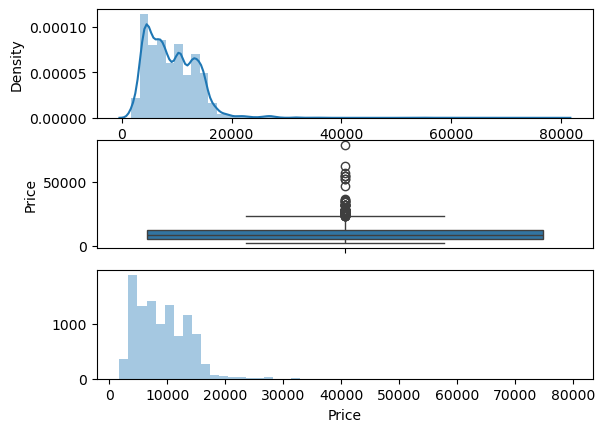

In [155]:
plot(data, 'Price')

In [166]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1

maximum= q3 + 1.5*iqr #if greater than this its an outlier
minimum= q1 - 1.5*iqr  #if less than this its an outlier

In [180]:
print(maximum , minimum)

23017.0 -5367.0


In [182]:
outliers_Prices= [price for price in data['Price']if price > maximum or price < minimum]

In [186]:
print(outliers_Prices)

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


8372.0

In [188]:
len(outliers_Prices)

94

In [194]:
data['Price']= np.where(data['Price']>= 35000, data['Price'].median(), data['Price'])

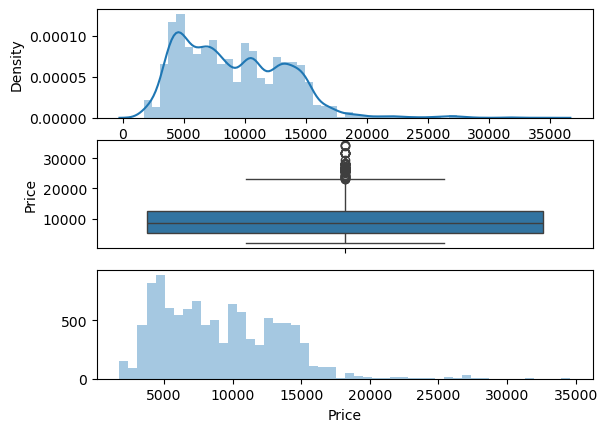

In [196]:
plot(data, 'Price')

In [198]:
#feature selection using mutual information approach to select the best features that will help 
#the algorithm predict the prices of flight tickets well
#if MI = 0 means the features are completely independent 
#If MI close to 1 means they have higher dependency 

In [240]:
X = data.drop(['Price'], axis =1) #independent variable is used

In [242]:
y = data['Price'] #dependent variable is selected

In [244]:
from sklearn.feature_selection import mutual_info_regression

In [246]:
imp= mutual_info_regression( X, y)

In [247]:
imp

array([1.31597917, 1.05135953, 0.79289129, 0.36989899, 0.61713356,
       0.9277451 , 0.75642824, 1.1383631 , 0.90567022, 1.12046764,
       0.67293188, 0.38065537, 0.44913115, 0.51452352, 0.13712651,
       0.19587471])

In [250]:
imp_df = pd.DataFrame(imp, index=X.columns)

In [252]:
imp_df.columns = ['Importance']

In [254]:
imp_df

,Importance
Airline,1.315979
Destination,1.051360
Total_Stops,0.792891
journey_Day,0.369899
journey_Month,0.617134
Dep_Time_Hour,0.927745
Dep_Time_Minute,0.756428
Arrival_Time_Hour,1.138363
Arrival_Time_Minute,0.905670
Duration_Hours,1.120468


In [256]:
imp_df.sort_values(by= 'Importance', ascending=False)

,Importance
Airline,1.315979
Arrival_Time_Hour,1.138363
Duration_Hours,1.120468
Destination,1.051360
Dep_Time_Hour,0.927745
Arrival_Time_Minute,0.905670
Total_Stops,0.792891
Dep_Time_Minute,0.756428
Duration_Mins,0.672932
journey_Month,0.617134


In [ ]:
#building the ML Algorithm  note that 75% of the dataset will be trated as training data while 25% will be trated as testing data

In [ ]:
#this creates a model for training and testing data

In [259]:
from sklearn.model_selection import train_test_split

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [267]:
from sklearn.ensemble import RandomForestRegressor

In [268]:
ml_model= RandomForestRegressor()

In [269]:
ml_model.fit(X_train, y_train) #checks relationship between x_train and y_train 

RandomForestRegressor()

In [273]:
y_pred = ml_model.predict(X_test)

In [279]:
y_pred

array([16840.14,  5322.78,  8774.86, ...,  3531.59,  6225.37,  6849.69])

In [281]:
from sklearn import metrics

In [283]:
metrics.r2_score(y_test, y_pred) #predicts the accuracy of the model

0.8139321365051475

In [295]:
import pickle

In [297]:
file = open(r'/Users/chideranwankwo/Desktop/Flight_Price_resources/model.pkl', 'wb')

In [323]:
pickle.dump(ml_model, file)

In [325]:
model = open(r'/Users/chideranwankwo/Desktop/Flight_Price_resources/model.pkl', 'rb')

In [327]:
forest = pickle.load(model)

UnpicklingError: invalid load key, '\x00'.

In [ ]:
y_pred2 = forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test, y_pred2)